In [3]:
#🎁05-1. 결정 트리

import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()
#class : '0'은 레드와인, '1'은 화이트와인
#화이트 와인이 양성 클래스

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

## 2사분위수(중간값)는 데이터를 일렬로 늘어놓았을 때 정중앙의 값
## 만약 데이터 개수가 짝수개는 가운데 2개 값의 평균 사용

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


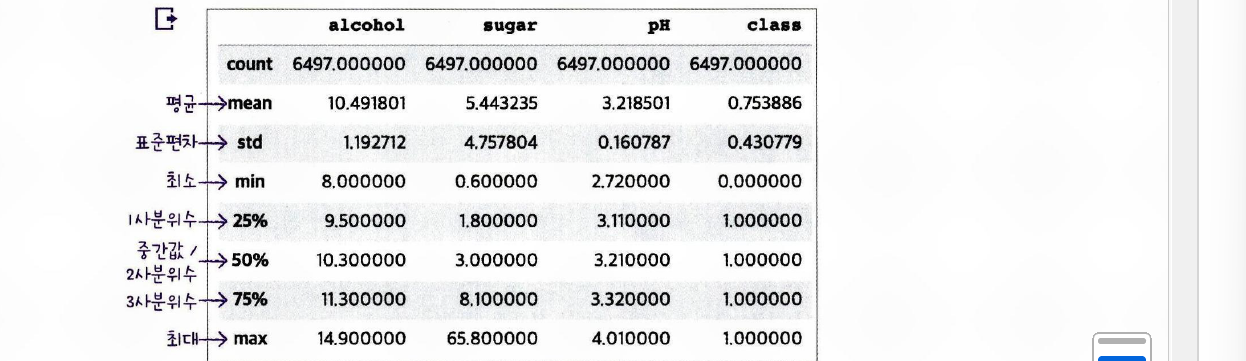

In [6]:
# [1]
data = wine[['alcohol','sugar','pH']]
target = wine['class']

In [7]:
# [2]
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

# train_test_split() 함수 기본값 25%를 테스트 세트로 지정
# 샘플갯수가 많아서 20%만 테스트 세트로 나누어서 test_size = 0.2

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
# [3] 클래스를 사용해 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# [4] 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#과소적합 경향 ---> 매개변수 변경?


0.7808350971714451
0.7776923076923077


In [10]:
#🪽설명하기 쉬운 모델과 어려운 모델
#모델을 설명하기 위해 로지스틱 회귀가 학습한 계수,절편 파악

print(lr.coef_, lr.intercept_)

#알코올 도수 값에 0.512..곱하고
#당도에 1.6733..곱하고
#pH값에 -6877..곱하고
#1.81..을 더한다.
# 이 값이 0보다 크면 화이트 와인, 작으면 레드 와인, 지금까지는 78% 정도만 화이트 와인으로 분류!

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [11]:
#🎄결정트리 : 순서도 처럼 쉽게 설명해서 가져오세요~
# 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델 훈련

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.996921300750433
0.8592307692307692


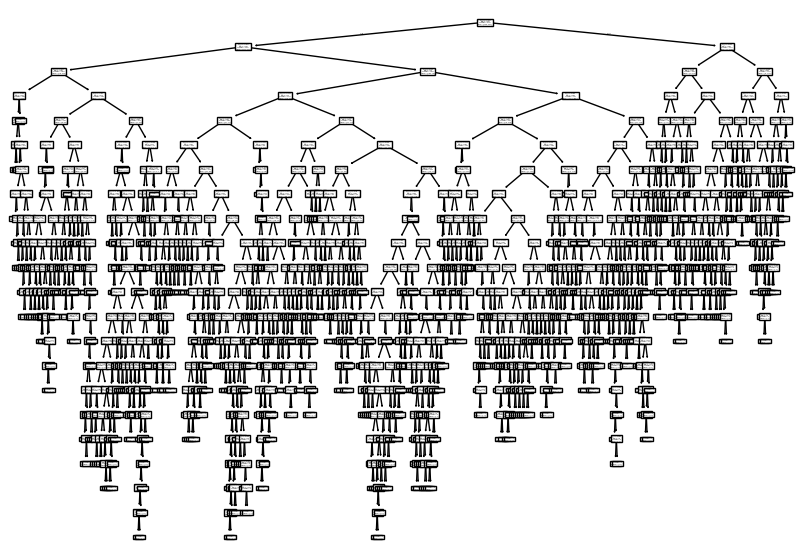

In [12]:
#🎄시각화

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

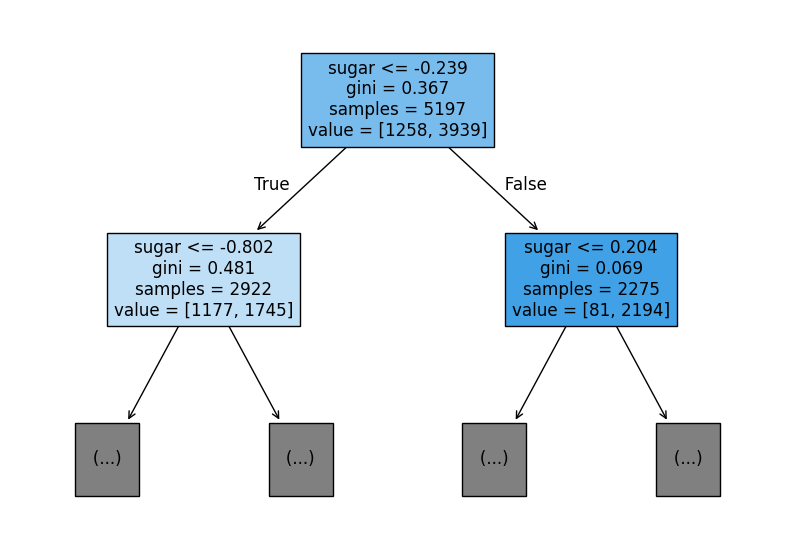

In [13]:
#🎄깊이 제한
#max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장
#filled : 노드의 색
#feature_names : 특성의 이름 전달
plt.figure(figsize=(10,7)) # figsize=(높이 인치,넓이 인치)
plot_tree(dt, max_depth=1, filled=True, #클래스의 비율이 높아질 수록 색이 진해짐
          feature_names=['alcohol','sugar','pH'])
plt.show()

#리프 노드에서 가장 많은 클래스가 예측 클래스가 됨(KNN과 비슷)
# (-0.239)를 기준으로 노드를 나눈 기준 : criterion 매개변수에 저장한 지니 불순도 사용

In [14]:
#‼️만약 여기서 성장을 멈추면 두 노드 모두 양성클래스 갯수가 많아서 양성클래스로 예측된다.

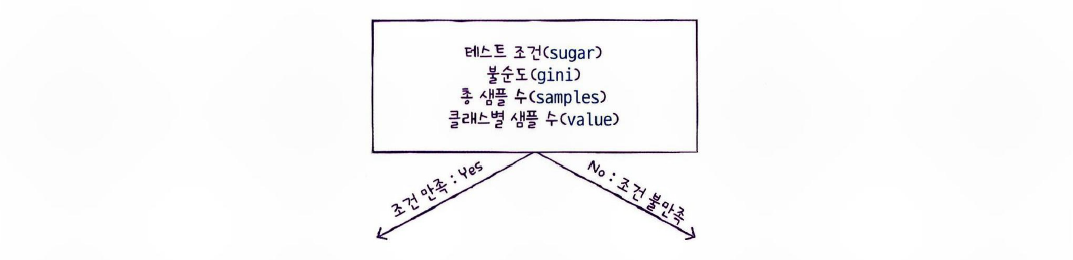

In [15]:
#불순도(지니) 계산🧮

#어떤 노드 두 클래스 비율이 1/2 이면 불순도 0.5
#어떤 노드 하나 클래스만 있다면 불순도는 0

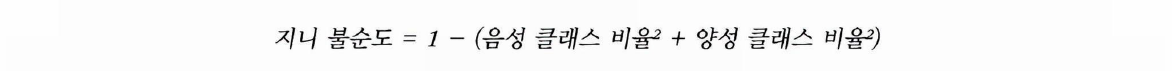
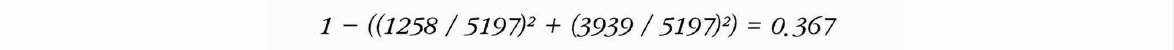

In [16]:
#🎄‼️부모 노드와 자식 노드 불순도 차이가 크도록!
#--자식 노드의 불순도를 샘플 개수에 비례하게 모두 더해 부모 노드의 불순도에서 minus

#부모와 자식 노드 사이의 불순도 차이 --> '정보이득'

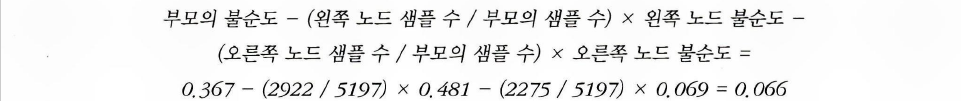

In [17]:
#불순도(2)_criterion=‘entropy’
#--gini 불순도와 같이 제곱이 아니라 🤍밑이 2인 로그를 사용하여 곱함

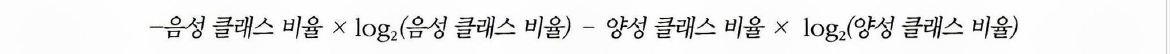
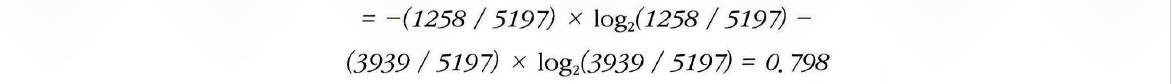

In [18]:
# 가지치기
#🤍결정 트리에서 가지치기를 간단한 방법 : 트리의 최대 깊이를 지정

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


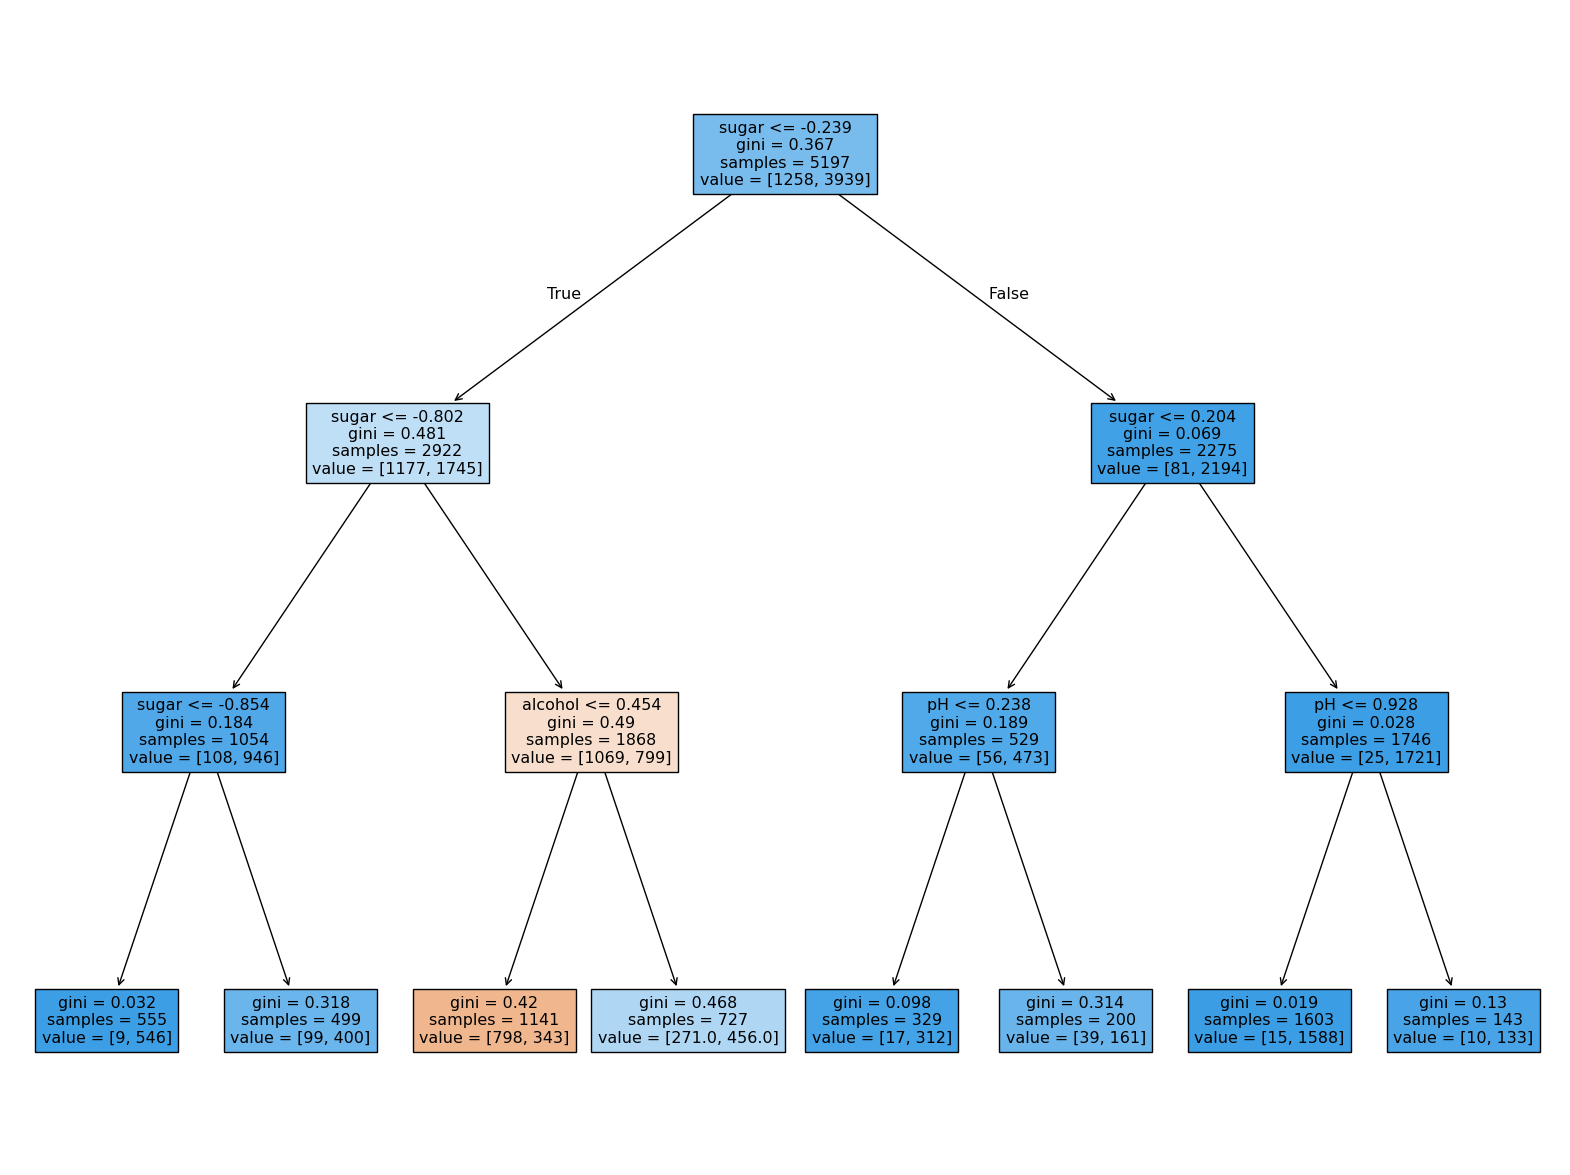

In [19]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

# 마지막 노드(깊이3)를 리프노드라고 함

In [20]:
#전처리 전의 훈련세트 및 테스트 세트!

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target)) 
print(dt.score(test_input, test_target)) 


0.8454877814123533
0.8415384615384616


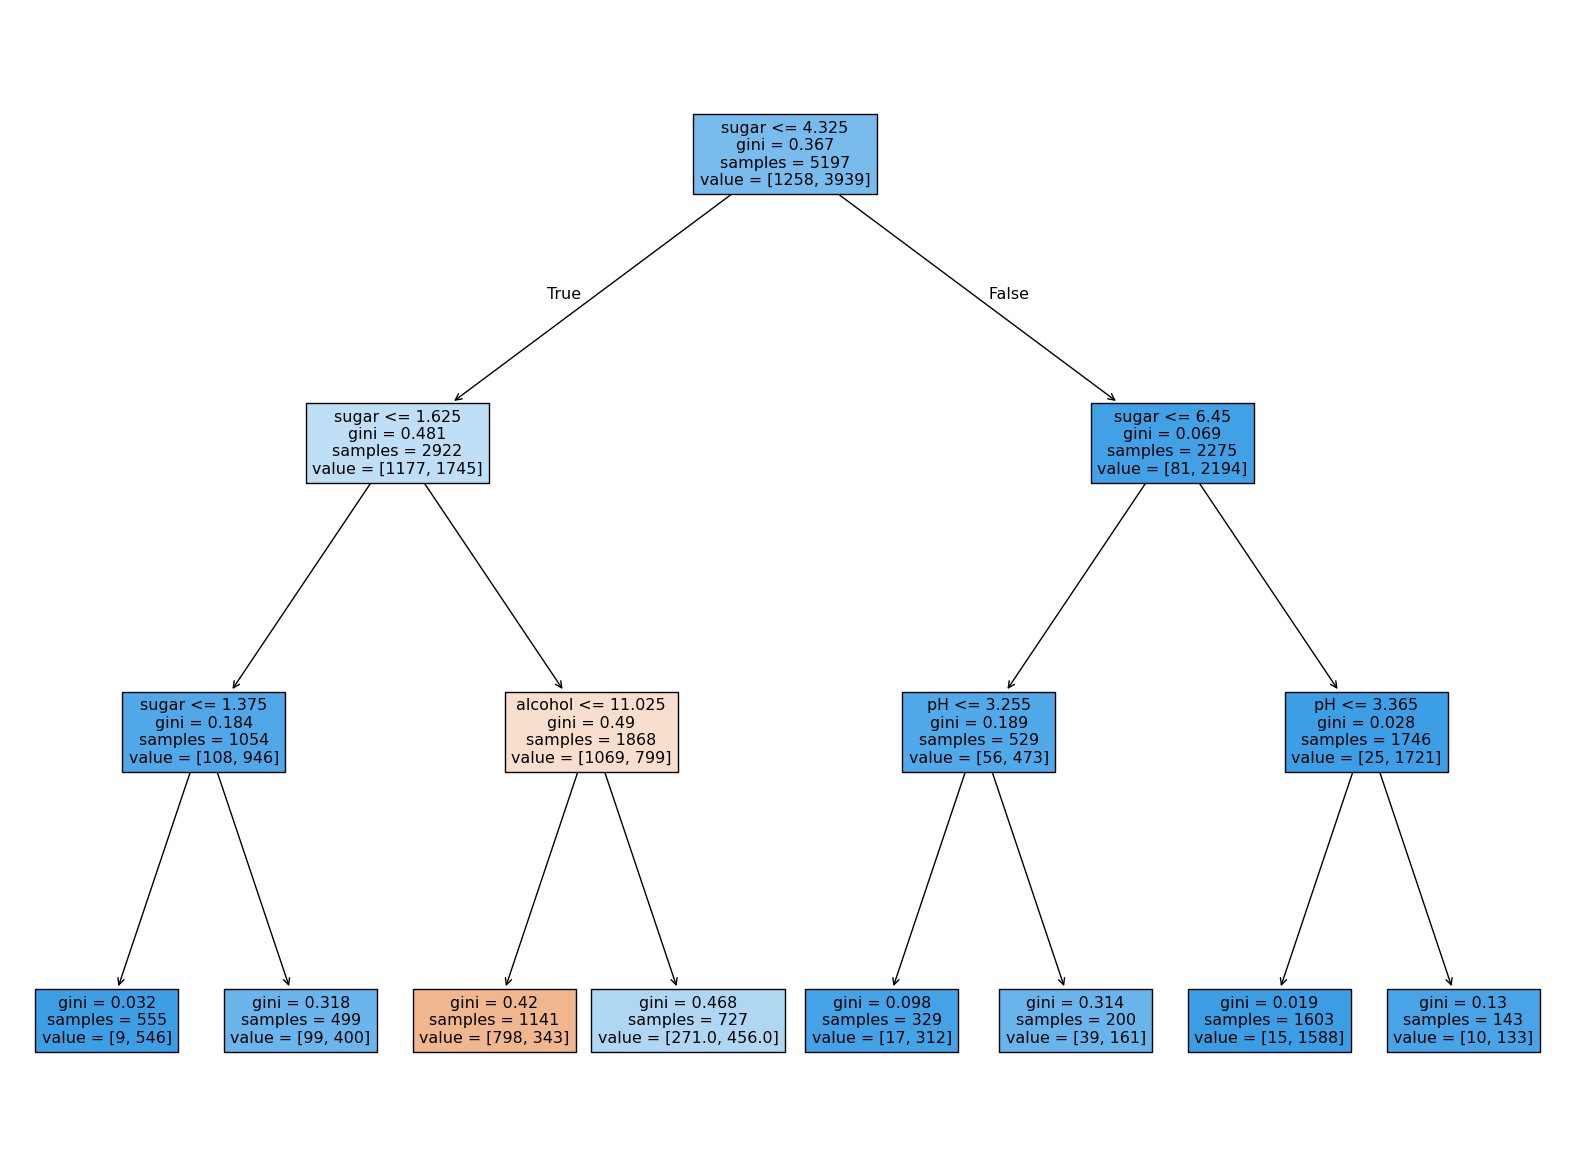

In [21]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [22]:
#🎄결정 트리는 어떤 특성이 가장 유용한지 나타냄 '특성 중요도'
print(dt.feature_importances_)

#두번째 특성인 당도가 중요도를 가장 높게 나타내고 있음!
#모두 더하면 1이 됨.
#특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별 더하여 계산


[0.12345626 0.86862934 0.0079144 ]


In [23]:
# 🎄마무리      

# 1. 결정 트리: yes/no 에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘      
# 2. 불순도: 결정 트리가 최적의 질문을 찾기 위한 기준(gini, 엔트로피)     
# 3. 정보이득: 부모 노드와 자식 노드의 불순도 차이        
# 4. 가지치기: 결정 트리의 성장을 제한        
# 5. 특성 중요도: 결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값     

# 🎄pandas
# 1. info(): 데이터프레임의 요약된 정보 출력      
# 2. describe(): 데이터프레임 열의 통계 값 제공       
# 3. DecisionTreeClassifier: 결정 트리 분류 클래스        
# 4. plot_tree(): 결정 트리 모델 시각화

⚡‼️테스트 세트로 일반화 성능을 올바르게 예측하려면 가능한 한 테스트 세트를 사용하지 말아야 한다.
⚡‼️모델을 만들고 나서 마지막에 딱‼️한 번만 사용하는 것이 좋다.

In [24]:
#🎁🎁05-2.교차 검증과 그리드 서치
# 검증 세트
#--테스트 세트 없이도 모델이 과대적합인지 과소적합인지 판단하기 위한 데이터를 말함

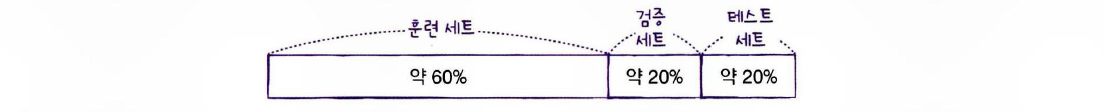

In [25]:
#⚡1.훈련세트에서 모델을 '훈련' -> 검증 세트로 모델 '평가'
#⚡2.테스트하고 싶은 매개변수를 바꿔가며 가장 좋은 모델 고르기
#⚡3.이 매개변수로 훈련세트와 검증세트를 합쳐 전체 훈련 데이터 모델에 다시 훈련
#⚡4.마지막에 '테스트'에서 최종 점수 평가

In [26]:
#(1)
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data') #데이터

In [27]:
#(2)
data = wine[['alcohol','sugar','pH']] #특성
target = wine['class']                #타킷

In [28]:
#(3)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=0.2, random_state=42)

In [29]:
#(4)⚡
#--train_inpup과 train_target을 다시 train_test_split() 으로 
#--훈련세트 sub_input, sub_target과 
#--검증세트 val_input, val_target을 만듦

sub_input, val_input, sub_target, val_target = train_test_split(
train_input, train_target, test_size=0.2, random_state=42)


⚡ train_test_split() 함수를 2번 적용해서 훈련세트와 검증세트로 나눠준 것!!

In [30]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [31]:
#(5)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

#----훈련세트 과대적합/매개변수를 바꿔서 더 좋은 모델!

0.9971133028626413
0.864423076923077


In [32]:
#🤍교차 검증 : 검증세트를 떼어 내어 평가하는 과정을 여러 번 반복함으로써,
#검증세트를 만드느라 줄어든 훈련세트를 채우고 검증 점수를 안정적으로 만들어 줌🤍

3-폴드 교차 검증 (K-폴드 교차 검증)        

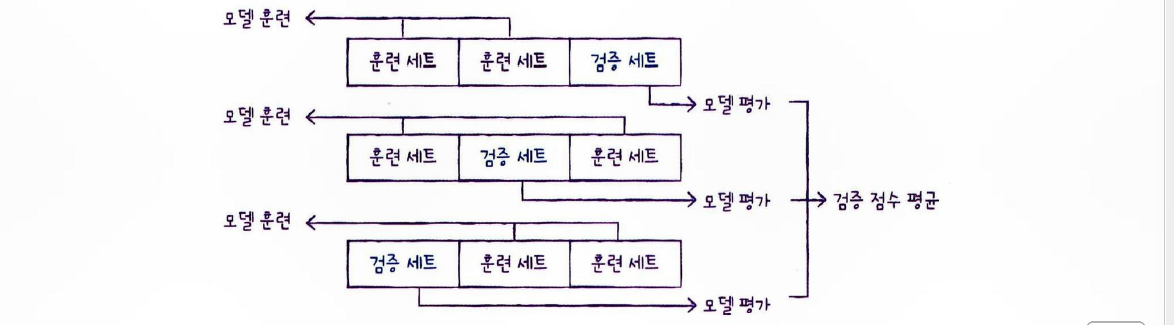

In [33]:
#🤍사이킷런, cross_validate
#🤍딕셔너리 반환
#🤍각 키마다 5개의 숫자 -- 5-폴드 교차 검증 수행해서!

from pprint import pprint
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
# print(scores)
pprint(scores)

{'fit_time': array([0.01165867, 0.00725555, 0.00714517, 0.00628352, 0.00615668]),
 'score_time': array([0.00350833, 0.00155759, 0.00202584, 0.00145626, 0.00139546]),
 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [34]:
#이름은 test_score이지만 검증 폴드의 점수임!
#--cross_validate 함수는 각 폴드별 측정값(fit_time, score_time, test_score 등)을 
#--넘파이 배열(NumPy Array) 형태로 딕셔너리에 담아 반환
#--파이썬의 기본 리스트(list)도 평균을 계산할 수는 있지만, 넘파이(NumPy)는 
#--수치 데이터를 담는 배열(ndarray)을 효율적으로 다루기 위해 만들어진 라이브러리입니다. 
#--넘파이 배열은 대규모 수치 연산에 최적화되어 있으며, .mean()과 같은 편리하고 빠른 통계 함수를 내장
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


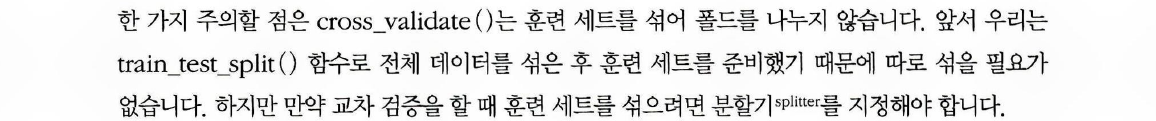
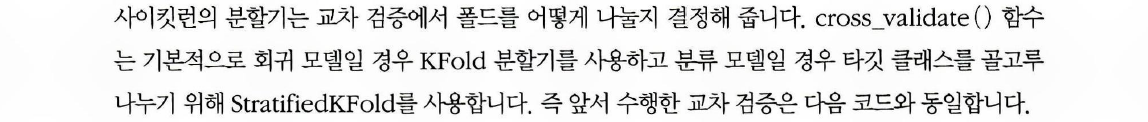

In [35]:
#기본 회귀 모델 kfold분할기
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [36]:
#훈련세트 섞은 후 10-폴드 교차 검증 하려면?!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [37]:
#🕊️🕊️하이퍼파라미터 튜닝
#--모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터
#🕊️사이킷런과 같은 ML Lib를 사용할 때 이런 하이퍼파라미터는 모두 '클래스'or'메서드'의 매개변수로 표현

# 1.먼저 lib가 제공하는 기본값 그대로 모델을 훈련
# 2.검증 세트 or 교차 검증 통해 매개변수 조금씩 바꿔감


In [38]:
#사이킷런 제공 그리드 서치
#--사이킷런의 GridSearchCV 클래스는 친절하게도 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행
#--별도로 cross_validate() 함수를 호출할 필요가 없음


#>>>기본 매개변수 트리 모델에서 min_impurity_decrease 매개변수으 최적값 찾기<<<
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'min_impurity_decrease': [0.0001, 0.0002, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [39]:
#>>>훈련이 끝나면 교차 검증 점수가 가장 높은 모델의 매개변수 조합으로 자동으로 다시 훈련함
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [40]:
#>>>그리드 서치로 찾은 최적의 매개변수 best_parmas_

print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [41]:
#>>>교차 검증의 평균점수 (5번의 교차 검증으로 얻은 점수)

print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [42]:
#gs 객체에서 가장 높은 값의 인덱스

print(gs.cv_results_['params'][gs.best_index_])

{'min_impurity_decrease': 0.0001}


즉,         
1. 탐색할 매개변수 지정     
2. 훈련 세트에서 그리드 서치 수행 ->최상의 평균 검증 점수가 나오는 매개변수 조합        
    (그리드서치 객체에 저장)
3. '최상의 매개변수'에서 (Not 교차검증 훈련세트) 전체 훈련 세트를 사용해 최종 모델 훈련         
    (그리드서치 객체에 저장)

In [43]:
#p33
params = {'min_impurity_decrease': np.arange(0.0001,0.001,0.0001),
                        #노드를 분할하기 위한 불순도 감소 최소량 지정
                        #0.00이에서 시작하여 0.001 이 될 때까지 0.0001을 더한 배열
          'max_depth': range(5,20,1),
                        #트리 깊이 제한
                        #5에서 20까지 1씩 증가하면서 15개의 값
          'min_samples_split': range(2,100,10)} 
                        #노드를 나누기 위한 최소 샘플 수
                        #2에서 100까지 10씩 증가 10개의 값

                        #매개변수 수행 교차 검증 횟수 9x15x10=1,350
                        #기본 5-폴드 교차검증 수행 6,750개

In [44]:
#최상의 매개변수 조합 확인
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params, n_jobs=-1)
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': range(5, 20), 'min_impurity_decrease': array([0.0001... 0.0009]), 'min_samples_split': range(2, 100, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [45]:
#최상의 매개변수 조합
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [46]:
#최상의 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [47]:
#🕊️랜덤 서치
#--매개변수 값이 수치일 때
#--너무 많은 매개 변수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴 때
#🤍매개변수 값의 목록을 전달X, 매개변수를 샘플링할 수 있는 확률분포객객체를 전달!

from scipy.stats import uniform, randint
#🍎scipy의 stats 서브 패키지에 있는 uniform과 randint 클래스는 주어진 범위에서 균등하게 값을 뽑는다
# randint : 정숫값
# uniform : 실숫값

In [48]:
rgen = randint(0,10)
rgen.rvs(10)

array([7, 2, 3, 9, 9, 3, 2, 5, 7, 6])

In [49]:
#샘플링 1,000개
np.unique(rgen.rvs(1000),return_counts=True)

#샘플링 개수가 늘어나니 0~9까지 숫자가 고르게 추출

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 92, 120,  97, 101,  90,  96, 102, 103,  93, 106]))

In [50]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.44129556, 0.80648   , 0.07855144, 0.33732821, 0.47547194,
       0.07065305, 0.50776054, 0.91832688, 0.94242902, 0.14176209])

In [51]:
#🤍탐색할 매개변수의 딕셔너리 만들기
#min_samples_leaf 매개변수 탐색 대상 추가 (리프 노드가 되기 위한 최소 샘플 수)
#자식 노드의 샘플 수가 이 값보다 작을 경우 분할하지 않음!

params = {'min_impurity_decrease' : uniform(0.0001, 0.001), #실숫값 샘플링
          'max_depth': randint(20,50), #정수
          'min_samples_split': randint(2,25), #정수
          'min_samples_leaf': randint(1,25),} #정수


In [52]:
#샘플링 횟수를 사이킷런,랜덤 서치 클래스인 RandomizedSearchCV의 n_iter 매개변수 지정

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

#매개변수 총100번 샘플링해서 교차 검증 수행
#그리드서치보다 교차검증 수 줄이고 넓은 영역을 효과적으로 탐색

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....x78df298eedd0>, 'min_impurity_decrease': <scipy.stats....x78df298ee620>, 'min_samples_leaf': <scipy.stats....x78df298efd00>, 'min_samples_split': <scipy.stats....x78df298eca60>}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [53]:
#최적 매개변수 조합
print(rs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [54]:
#최고 교차검증 점수
print(np.max(rs.cv_results_['mean_test_score']))

0.8695428296438884


In [55]:
#전체 훈련 세트(train_input, train_target)로 훈련된 최적의 모델 best_estimator_속에 저장
dt = rs.best_estimator_
print(dt.score(test_input, test_target))

#테스트 세트 점수는 검증 세트에 대한 점수보다 조금 작은 것이 일반적임


0.86


In [56]:
##### 마무리
# 1. 데이터 분리와 모델 평가      
# ❄️ 테스트 세트의 역할 제한: 모델의 최종 선택 전까지 테스트 세트를 사용하면 안 됨.   
#     하이퍼파라미터 튜닝 과정에서 테스트 세트를 사용하면 모델이 테스트 세트에 overfitting        
# ❄️ 검증 세트 (Validation Set): 테스트 세트 사용 없이 모델을 평가하고 하이퍼파라미터를   
#     튜닝하기 위해, 훈련 세트(Training Set) 중 일부를 덜어낸 세트      

# 2. 안정적인 성능 평가: 교차 검증 (Cross-Validation)          
# ❄️ 훈련세트를 여러 폴드로 나눈 다음 한 폴드가 검증 세트의 역할을 하고 나머지 폴드에서는         
#     모델을 훈련, 검증 점수를 얻어 평균하는 방법~     

# 3. 효율적인 하이퍼파라미터 탐색     
# ❄️ 그리드 서치 (Grid Search)        
#     하이퍼파라미터 탐색을 자동화해주는 도구     
#     탐색할 매개변수를 나열하면 교차 검증을 수행하고 가장 좋은 검증 점수의 매개변수 조합 선택        
#     이 매개변수 조합으로 최종 모델 훈련     
# ❄️ 랜덤 서치 (Random Search)/확률 분포 기반 샘플링           
#     연속된 매개변수 값 탐색할 때 유용       
#     탐색할 값을 나열하는 것이 아니고, 탐색 값을 샘플링할 수 있는 확률 분포 객체를 전달      
#     지정된 횟수 만큼 샘플링해서 교차 검증 수행      
#     따라서 시스템 자원이 제한된 상황, 허락하는 만큼 탐색량 조절 가능             

# 4. 다음 단계: 앙상블 모델 (Ensemble Model)      
#     결정 트리를 확장하여 다양한 작업에서 뛰어난 성능을 보이는 모델      



핵심 패키지와 함수        
scikit-learn             
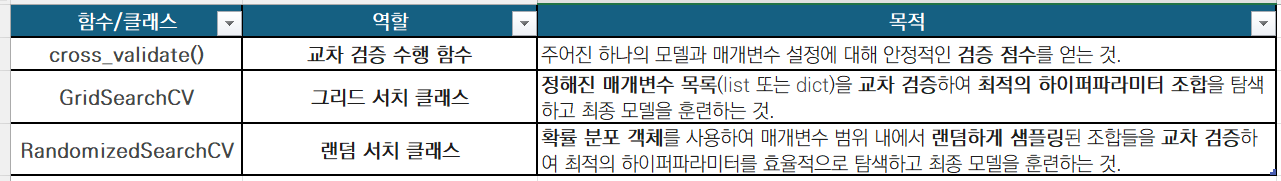          
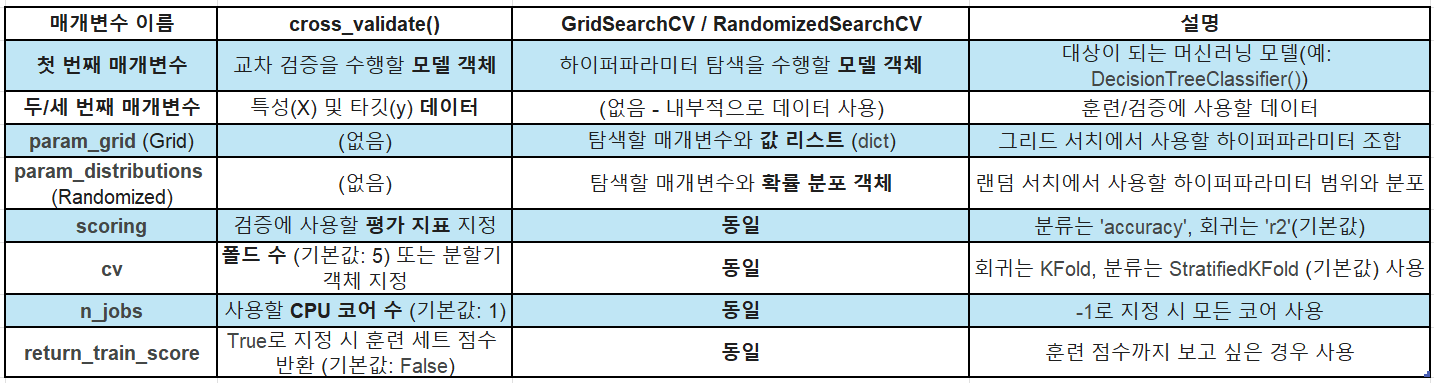

정형 데이터와 비정형 데이터     
        
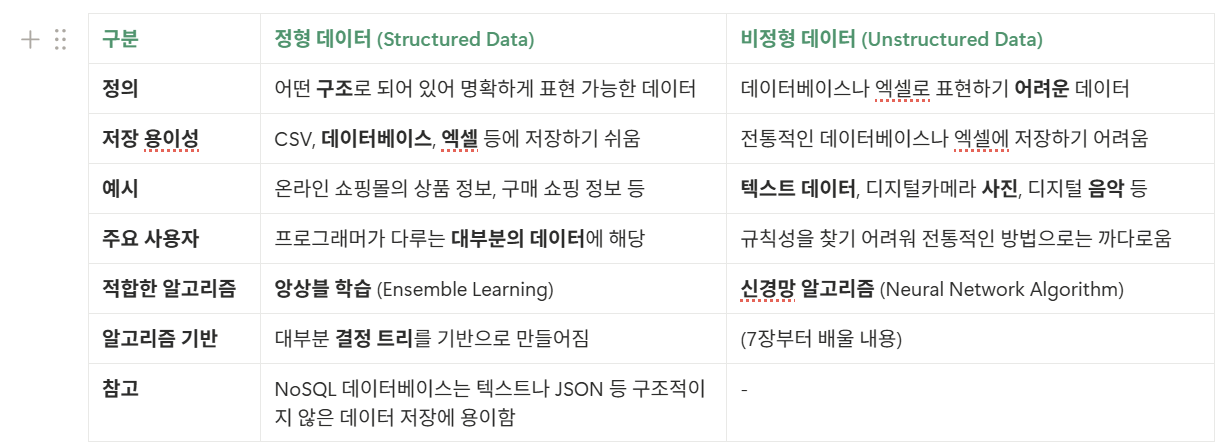

In [57]:
#🎁🎁🎁 05-3. 트리의 앙상블__랜덤 포레스트 random forest
#--랜덤 포레스트는 결정 트리를 랜덤하게 만들어 결정트리의 숲을 만든다.
#--각 결정 트리의 예측을 사용해 최종 예측을 만든다.

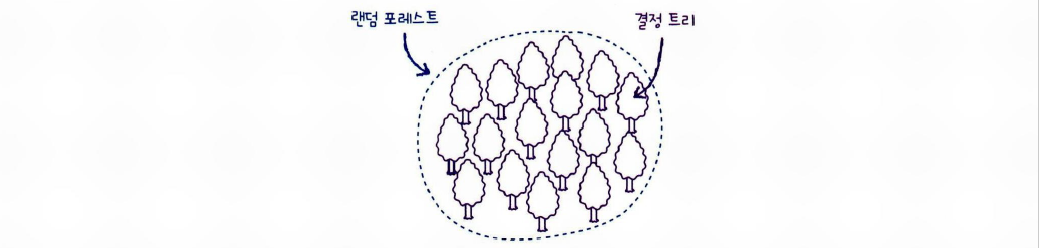

In [58]:
#1. 각 트리를 훈련하기 위한 데이터를 랜덤하게 만듦
#2. 우리가 입력한 훈련 데이터에서 랜덤하게 샘플을 추출해서 훈련 데이터를 만듦
#⚡이때, 샘플이 중복되어 추출될 수 있음
#⚡중복된 샘플을 허용해서 샘플을 만드는 것을 --> ❄️부트스트랩 샘플 bootstrap sample
# 부트스트랩 샘플은 훈련 세트의 크기와 같게 만듦


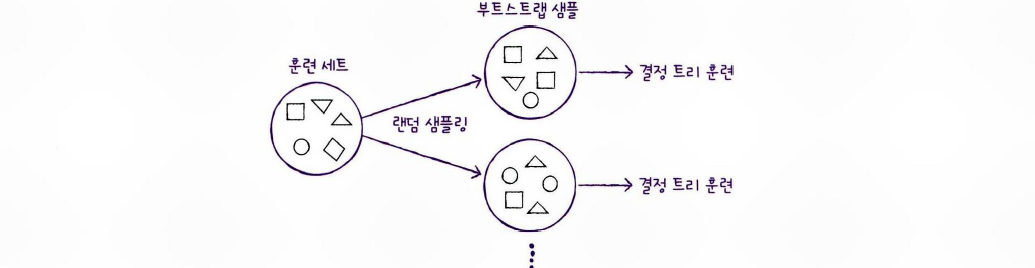

In [59]:
#🎄분류 모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼의 특성을 선택
#🎄회귀 모델인 RandomForestRegressor는 전체 특성을 사용


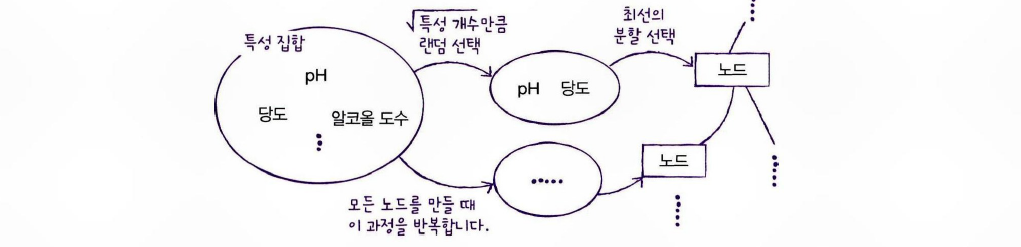      

🎄랜덤포레스트는 랜덤하게 선택한 샘플과 특성을 사용해서 훈련 세트에 과대적합되는 것을 막아줌

In [ ]:
# 와인 데이터셋, 판다스로 불러와 훈련세트와 테스트 세트로 나눔
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']]
target = wine [['class']]

train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=0.2, random_state=42)

In [ ]:
#🍂🍂교차검증
#--랜덤포레스트 분류는 기본적으로 100개의 결정 트리를 사용하므로 n_jobs 매개변수를 -1로 지정하여
#모든 CPU 코어를 사용하는 것이 좋음

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

scores = cross_validate(rf, train_input, np.ravel(train_target), 
#‼️타겟 변수(예:train_target)를 모델에 전달하기 전에 numpy의 ravel() 함수를 사용하여 1차원 배열로 평탄화
return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


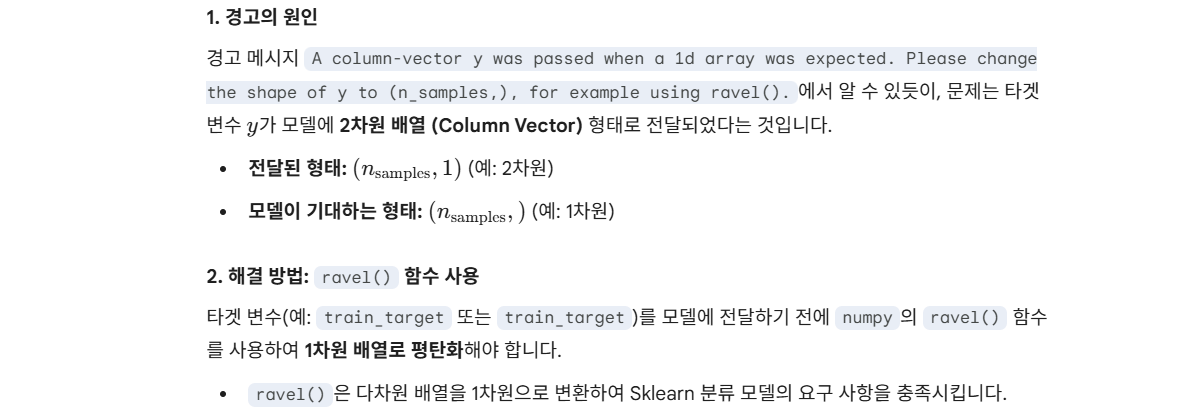

In [62]:
# 랜덤 포레스트는 결정 트리의 큰 장점 중 하나인 특성 중요도를 계산함
# 랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합한 것

rf.fit(train_input, np.ravel(train_target))
print(rf.feature_importances_)

## 랜덤 포레스트가 특성을 골고루 선택하고 훈련함으로써 다소 균등한 값을들 보이게 됨.
## 과대적합을 줄이고 일반화 성능을 높임

[0.23167441 0.50039841 0.26792718]


In [63]:
# OOB (Out-of-Bag) 샘플 -> 랜덤 포레스트 훈련 시 부트스트랩 샘플에 포함되지 않고 남은 훈련 데이터
# 이 샘플들은 트리가 훈련하지 않은 데이터이므로 검증 세트 역할을 수행
# oob_score=True로 설정하면 별도의 검증 과정 없이 모델의 일반화 성능을 추정
# OOB 점수는 rf.oob_score_ 속성을 통해 확인
# 이는 교차 검증을 대체하여 효율적인 모델 평가를 가능하게 하는 중요한 기능

In [64]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, np.ravel(train_target))
print(rf.oob_score_)

# OOB 점수를 사용하면 교차 검증을 대신할 수 있어서 훈련 세트에 더 많은 샘플을 사용할 수 있다.

0.8934000384837406


In [ ]:
#🦩🦩🦩엑스트라 트리, ExtraTreesClassifier
#🦩훈련 방식: 전체 훈련 세트를 사용하여 각 결정 트리를 훈련
# --- 랜덤 포레스트와 달리 부트스트랩 샘플링을 사용하지 않음
#🦩분할 무작위성: 노드를 분할할 때 최적의 분할 대신 특성을 무작위로 선택하여 분할
#🦩핵심 원리: DecisionTreeClassifier의 splitter='random'
#🦩앙상블 효과: 개별 트리의 성능은 낮아지지만, 많은 트리를 앙상블하여 과대적합을 방지하고 성능을 높임
#🦩사이킷런 클래스: ExtraTreesClassifier를 사용

from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

scores = cross_validate(et, train_input, np.ravel(train_target),
return_train_score=True, n_jobs=-1)                                                   
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [81]:
et.fit(train_input, np.ravel(train_target))
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [ ]:
#🐋🐋🐋 그레이디언트 부스팅  GradientBoosting 
#🐋원리_이전 트리의 오차(잔차)를 보완하기 위해 깊이가 얕은(기본 깊이 3) 결정 트리를 순차적으로 앙상블하는 방식
#🐋작동 방식_경사 하강법(Gradient Descent)을 사용하여 손실 함수의 낮은 곳(최소)을 향해 새로운 트리를 추가하며 이동
#🐋특징_깊이가 얕은 트리를 사용하므로 과대적합에 강하며 일반적으로 높은 일반화 성능을 기대
#🐋손실 함수_분류에는 로지스틱 손실 함수, 회귀에는 평균 제곱 오차를 사용
#🐋조절_학습률(Learning Rate) 매개변수를 통해 경사 하강 속도를 조절하여 최적의 지점

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, np.ravel(train_target),
return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))



0.8881086892152563 0.8720430147331015


In [ ]:
#GradientBoosting 은 결정 트리 개수를 늘려도 과대적합에 강함!

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,
random_state=42)

scores = cross_validate(gb, train_input, np.ravel(train_target),
return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [69]:
#GradientBoosting 도 특성 중요도를 제공
gb.fit(train_input, np.ravel(train_target))
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


In [ ]:
#🎨히스토그램 기반 GradientBoosting  

#정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘
#먼저 입력 특성을 256개 구간으로 나눔
#그래서 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있음
#히스토그램 기반 GradientBoosting은 256개의 구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용

from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)

scores = cross_validate(hgb, train_input, np.ravel(train_target), ##(n,1)을 (n,)으로 펴줌
return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9321723946453317 0.8801241948619236


In [ ]:
#GradientBoosting 은 특성 중요를 제공 하지 않으므로
#중요도를 계산하기 위해 permutationJmportance () 함수를 사용
#특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지를 관찰하여 어떤 특성이 중요한지를 계산

#먼저 히스토그램 기반 GradientBoosting모델을 훈련 -> 훈련 세트에서 특성 중요도를 계산
#n.repeats 매개변수는 랜덤하게 섞을 횟수를 지정


#‼️훈련 세트 중요도 계산
from sklearn.inspection import permutation_importance
hgb.fit(train_input, np.ravel(train_target))
result = permutation_importance(hgb, train_input, np.ravel(train_target),
n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)


#⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️
#❄️[특성중요도(importances), 평균(importances_mean), 표준 편차(importances_std]

[0.08876275 0.23438522 0.08027708]


In [ ]:
#‼️테스트 세트 중요도 계산
result = permutation_importance(hgb, test_input, test_target,
n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

#😮어떤 특성에 관심을 둘지 예상 가능

[0.05969231 0.20238462 0.049     ]


In [76]:
#‼️HistGradientBoostingClassifier를 사용해 테스트 세트에서의 성능을 최종 확인

hgb.score(test_input, test_target)

0.8723076923076923

In [ ]:
#XGBoost : 그레이디언트 부스팅 알고리즘을 구현한 라이브러리
#tree_method 매개변수를 ‘hist’로 지정하면 히스토그램 기반 그레이디언트 부스팅을 사용 가능

#XGBoost를 사용해 와인 데이터의 교차 검증 점수 확인
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)

scores = cross_validate(xgb, train_input, np.ravel(train_target),
return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9567059184812372 0.8783915747390243


In [ ]:
#LightGBM

from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

scores = cross_validate(xgb, train_input, np.ravel(train_target),
return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9567059184812372 0.8783915747390243


🕊️마무리

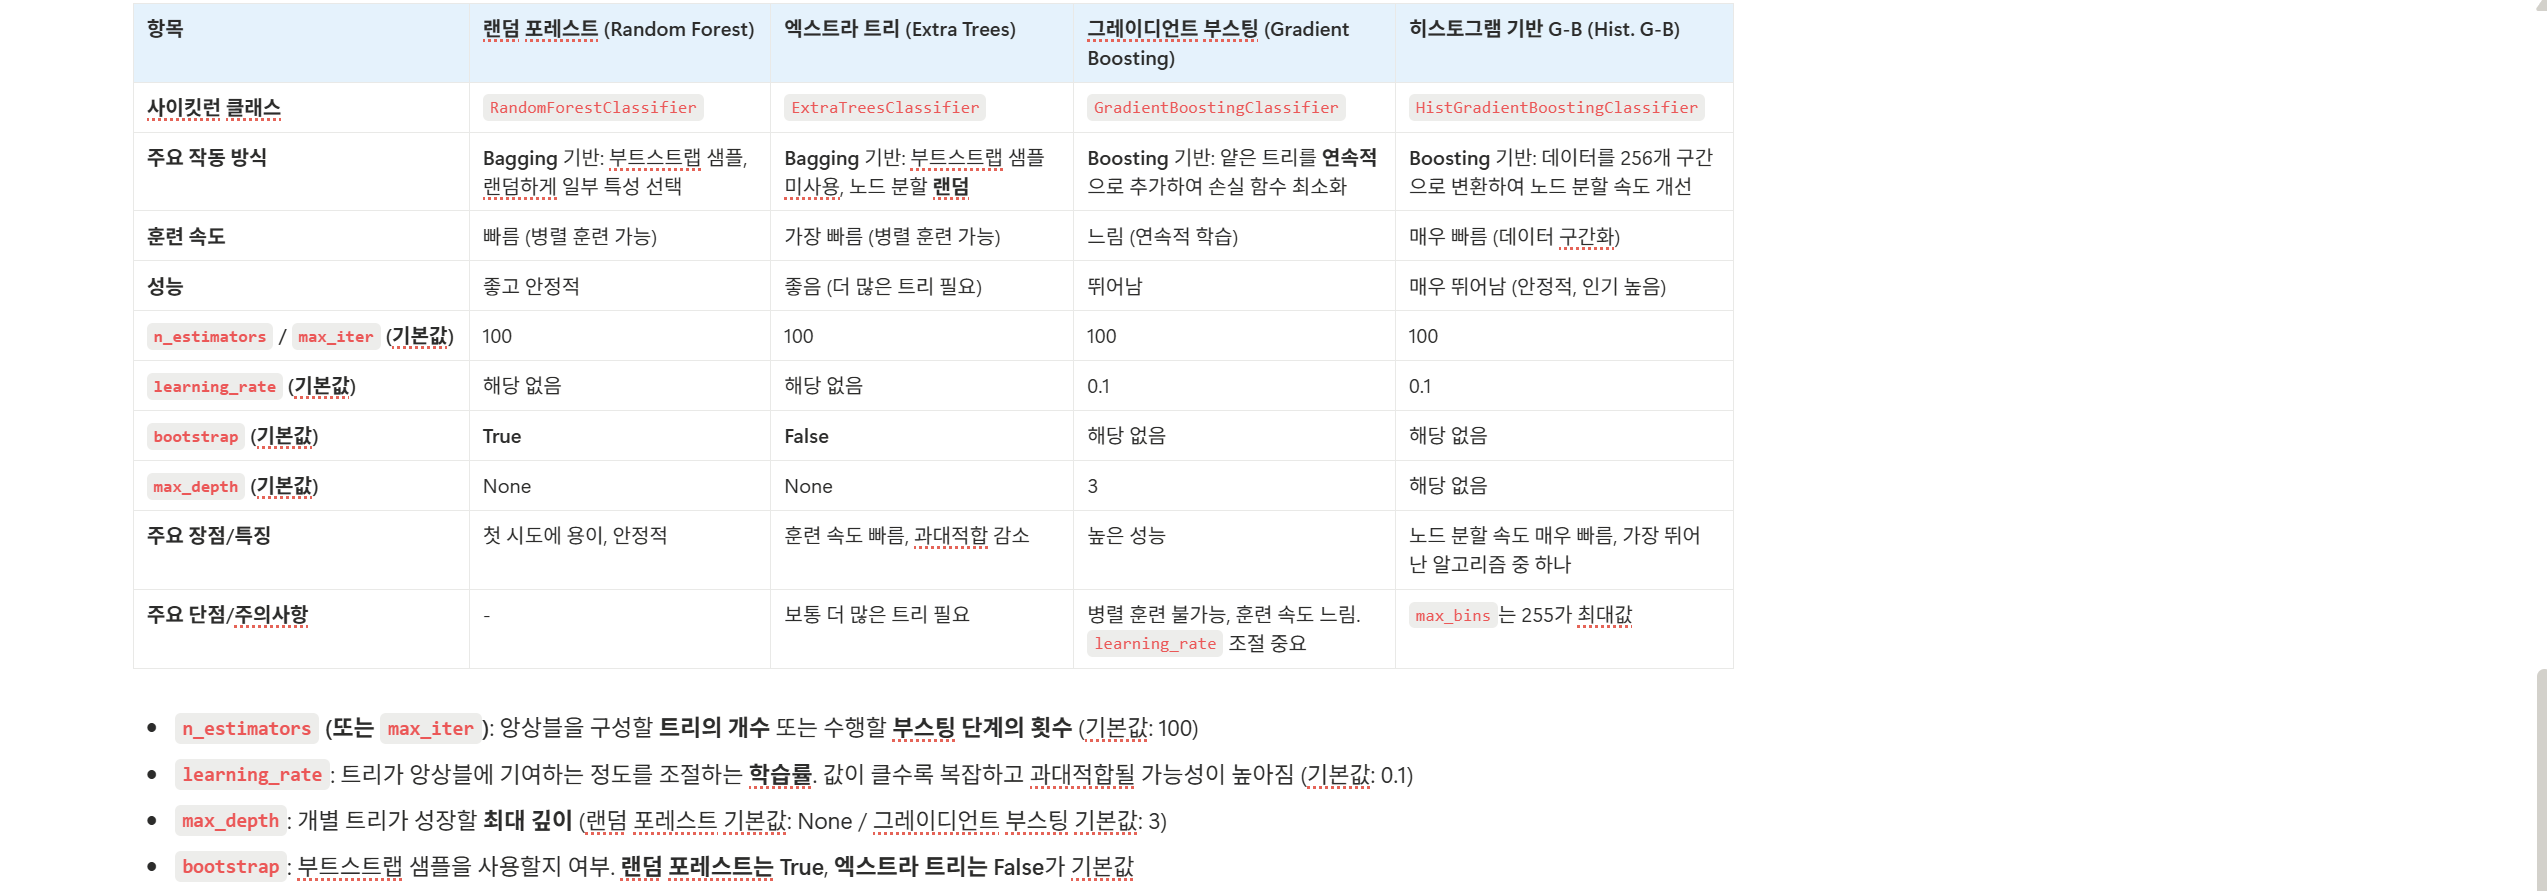